In Python, the module
```
numpy.linalg
```
provides functions for solving eigenvalue problems. For instance

```
eigh
```
calculates the eigenvalues and eigenvectors of a real symmetric or *Hermitian* matrix using the *QR* algorithm (not discussed here). Here's an example for solving the matrix equation $\mathbf{Av} = \lambda \mathbf{v}$,

In [1]:
import numpy as np

A = np.array([[1,2],[2,1]],float)  #rows
#print(A)
x, v = np.linalg.eigh(A)
print(x)
print(np.dot(v[:,1],v[:,1]))

[-1.  3.]
0.9999999999999998


The $x$ array contains the eigenvalues and the two-dimensional array $\mathbf{V}$ contains in the eigenvectors in the *columns*. We would write the eigenvectors as $(-1,1)/\sqrt{2}$ and $(1,1)\sqrt{2}$. If only the eigenvalues are required, some time can be saved for large matrices by using

```
eigvalsh
```
For example,

In [2]:
A = np.array([[1,2],[2,1]],float)
x = np.linalg.eigvalsh(A)
print(x)

[-1.  3.]


What happens if you provide an asymmetric matrix? The algorithm does not return an error message. Instead the algorithm assumes that the elements above the diagonal are mirror images of the ones below.

In [3]:
A = np.array([[1,0],[2,1]],float)
x = np.linalg.eigvalsh(A)
print(x)

[-1.  3.]


If the matrix is complex instead of real, the algorithm will assume it to be Hermitian.

## Asymmetric quantum well

Quantum mechanics can be formulated as a matrix problem. As such. we can solve using linear-algebra methods. But what if the potential varies inside the well? Now the problem is more difficult and cannot, in general, be solved analytically. But the solutions are "straightforward" on a computer.

Recall the TISE equation $\hat{H}\psi(x) = E\psi(x)$ where $\hat{H}$ is the Hamiltonian operator. If we assume that the walls of the well are infinitely high, the wavefunction must be zero at $x=0$ and $x=L$ and wavefunction can be expressed as a Fourier $\sin$ series, i.e.,

$$\psi(x) = \displaystyle \sum_{n=1}^{\infty}c_n\sin \frac{\pi nx}{L}$$

We can solve the TISE using "Fourier's trick", namely, multiply both sides by $\sin(\pi mx/L)$ and integrate from $0$ to $L$, or 

$$\displaystyle \sum_{n=1}^{L} c_n \int_0^L \sin \frac{\pi mx}{L} \left[- \frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x) \right] \sin \frac{\pi nx}{L}dx = \frac{L}{2}Ec_m$$

where if $m=n$ $(m \ne n \rightarrow 0)$

$$\int_0^L \sin \frac{\pi mx}{L} \sin{\pi nx}{L}dx = \frac{L}{2}$$

Now define a matrix $\mathbf{H}$ with elements

$$H_{mn} = \frac{2}{L} \int_0^L \sin \frac{\pi mx}{L} \left[-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}+V(x) \right]\sin \frac{\pi nx}{L}dx$$

such that

$$\mathbf{H\psi} = E\mathbf{\psi}$$

where $\mathbf{\psi} = (c_1, c_2, \cdots)$. Thus $\mathbf{\psi}$ is an eigenvector of the *Hamiltonian matrix* $\mathbf{H}$ with eigenvalue $E$.

- Solve the asymmetric well for an electron with $V(x) = ax/L$ where $a=10$ eV, and $L = 5$ Angstroms.

Here

\begin{align*}
\int_0^L x \sin \frac{\pi mx}{L} \sin \frac{\pi nx}{L}dx = 
\begin{cases}
0 &\text{if $m \ne n$ and $m$ and $n$ are both even or both odd} \\
-\left(\frac{2L}{\pi}\right)^2 \frac{mn}{(m^2 - n^2)^2}  &\text{if $m \ne n$ and one is even, one is odd} \\
L^2/4  &\text{if $m=n$}
\end{cases}
\end{align*}

Energy  [  5.83920746  11.18915626  18.68111853  29.17678791  42.70609181
  59.25877389  78.82945468 101.41623857 127.01688503 155.75948582]


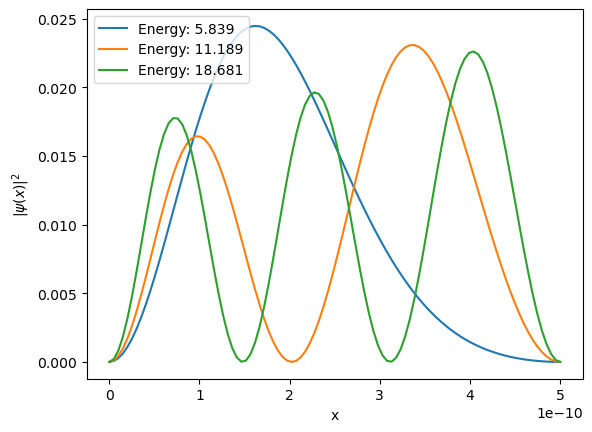

In [6]:
# Eigenvalue problem for an infinite potential well with V(x) -> x, 0 < x < L
import matplotlib.pyplot as plt

L = 5e-10  #m
N = 10
hbar = 6.62607015e-34/(2*np.pi)  #Js
m = 9.1094e-31  #kg

hbar_2m = (hbar/m)*hbar/2.
a_L = 10*1.6e-19/L #J

def build_H(N,L):   #n definite the number of elements in the eigenvector H = nxn
    H = np.zeros([N,N], float)
    for i in range(N):
        for j in range(N):
            n = i+1
            m = j+1
            if (m == n):
                H[i,j] = (hbar_2m*np.pi**2/L**2)*n**2 + a_L*L/2
            if not (m % 2 == n % 2):
                H[i,j] += -a_L*(2/L)*(2*L/(np.pi))**2*(n*m)/(m**2 - n**2)**2
    return H

H = build_H(N,L)
#print(H)

E, cn = np.linalg.eigh(H)
E = E/1.6e-19
print('Energy ',E)

x = np.linspace(0,L,100)
psi = np.zeros([len(x),N])
for j in range(N):
    c = cn[:,j]
    for i in range(len(c)):
        n = i+1
        psi[:,j] += c[i]*np.sin(np.pi*n*x[:]/L)


for i in range(0,3):
    norm = np.sum(abs(psi[:,i])**2)
    plt.plot(x,abs(psi[:,i])**2/norm, label = 'Energy: '+"{:.3f}".format(E[i]))
    #plt.plot(x,(psi[:,i]),label = 'Energy:'+"{:.3f}".format(E[i]))
plt.xlabel('x')
plt.ylabel('$|\psi(x)|^2$')
plt.legend()


## Orthogonality of eigenvectors

Always worth checking if this is true for real symmetric matrices or Hermitian matrices (for complex values).

In [7]:
for i in range(N):
    print(np.dot(cn[:,0],cn[:,i]))

1.0000000000000002
2.7755575615628914e-16
-1.3877787807814457e-17
-3.469446951953614e-18
-4.336808689942018e-19
-6.5052130349130266e-18
-7.535205098774256e-18
1.8973538018496328e-19
-8.267041565201971e-19
-1.802486111757151e-18


## Symmetric potential well solution

We can also use a matrix solution method for the 1-D symmetric potential well. If we can write the Schrodinger equation as a matrix equation, then we can use the methods of linear algebra to solve the problem directly. (This is Lab 11 revisited!) The numerical scheme of the shooting method is with $\hbar/2m = 1$

$$\frac{1}{(\Delta x)^2}(\psi[k+1] - 2\psi[k]+\psi[k-1])+V(x[k])\psi[k] \approx E\psi[k]$$

Can we write this difference equation in the form $\mathbf{H\psi} = E \mathbf{\psi}$ where $\mathbf{H}$ is the *Hamiltonian matrix*? Sure, but we use the spatial indices of the grid locaitons to write build the matrix equations, i.e.,

\begin{align*}
\frac{1}{\Delta x^2}
\begin{bmatrix}
-2 + V(x[0])    & 1             & 0             & \cdots \\
1               & -2 + V(x[1])  & 1             & \cdots \\
0               & 1             & -2 + V(x[2])  & \cdots \\
\cdots          & \cdots        & \cdots        & \cdots \\
\end{bmatrix}
\begin{bmatrix}
\psi[0] \\
\psi[1] \\
\psi[2] \\
\cdots
\end{bmatrix}

= 
E
\begin{bmatrix}
\psi[0] \\
\psi[1] \\
\psi[2] \\
\cdots
\end{bmatrix}
\end{align*}

This is a simple eigenvalue problem!

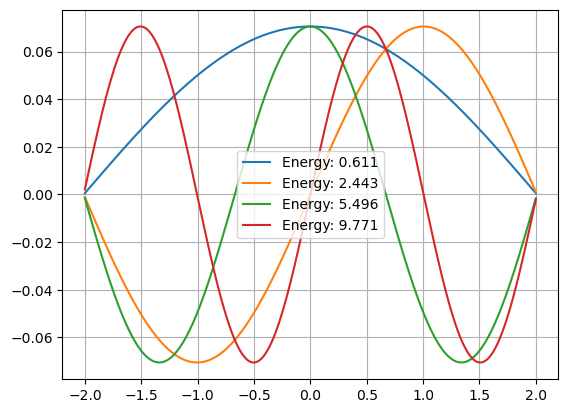

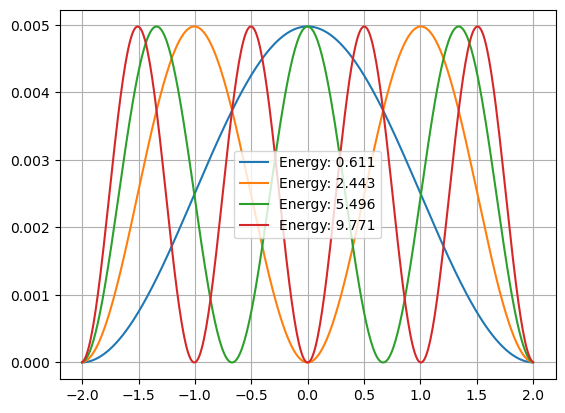

In [9]:
def get_potential(x,Vinf):
    a = 1.0
    V = np.zeros(len(x))
    wh = np.where(abs(x) >= a)
    V[wh[0]] = 0
    return V

def get_potential_1(x,Vinf):
    a = 1.0
    V = 0.5*x**2
    wh = np.where(abs(x) >= a)
    V[wh[0]] = 0
    return V

Vinf = 100.0
dx = 0.01
x = np.arange(-2,2+dx,dx)
N = np.size(x)

V = get_potential(x,Vinf)

H = np.diag(2/dx**2 + V/dx**2)
H = H + np.diag((-1/dx**2)*np.ones(N-1),1)
H = H + np.diag((-1/dx**2)*np.ones(N-1),-1)

E, psi = np.linalg.eigh(H)
physical = np.where(E<Vinf)[0]  #many solutions diverge!

for i in physical[:4]:
    plt.plot(x,psi[:,i],label = 'Energy: ' + "{:.3f}".format(E[i]))
plt.legend()
plt.grid()
plt.show()

for i in physical[:4]:
    plt.plot(x,abs(psi[:,i])**2, label = 'Energy: ' + "{:.3f}".format(E[i]))
plt.legend()
plt.grid()
plt.show()
